In [1]:
!python -m pip uninstall -y changed

Found existing installation: changed 0.0.1
Uninstalling changed-0.0.1:
  Successfully uninstalled changed-0.0.1


In [2]:
!python -m pip install 'git+https://github.com/grosed/changed/#egg=changed&subdirectory=python/package'

  Cloning https://github.com/grosed/changed/ to /tmp/pip-install-ijp750b4/changed_6e42a4845f3548aba67e41b7907324c5
  Running command git clone --filter=blob:none --quiet https://github.com/grosed/changed/ /tmp/pip-install-ijp750b4/changed_6e42a4845f3548aba67e41b7907324c5
  Resolved https://github.com/grosed/changed/ to commit 38795459dc0e0a663ccaea8140606163e937abb7
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for changed: filename=changed-0.0.1-py3-none-any.whl size=16730 sha256=258cce63aa9b74663aa892b0b891974ad4c1a40b9179645d5608b93c693287d3
  Stored in directory: /tmp/pip-ephem-wheel-cache-13bd6r1c/wheels/54/04/4a/740010f31cceeeeaf64c7bf0e4e8b26eca12edc6aeb6de0faa
Successfully built changed


In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm,median_abs_deviation,chi2

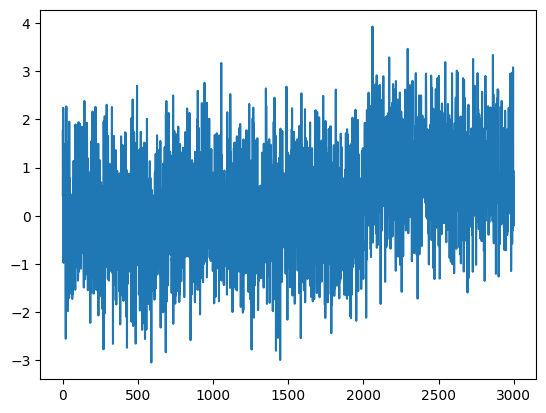

In [4]:
np.random.seed(0)
X = [0.0 for i in range(2000)] + [1.0 for i in range(1000)]
E = norm.rvs(size=len(X))
X = [x+e for x,e in zip(X,E)]
plt.plot(X)
plt.show()

In [5]:
from changed.cost.normal import mean as nm

In [6]:
cf = nm(X)

In [7]:
from changed.core import split

In [8]:
R = list(range(len(X)))
split(cf,cf,R)

(2002, 2819.4281452840214)

In [9]:
from changed.methods import amoc
from math import log

In [10]:
beta = 2*log(len(X))
amoc(cf,R,beta)

(2002, 2835.4408804193217)

In [11]:
from changed.methods.sequential import sop,sop_state

In [12]:
S = sop_state()
S = sop(S,cf,R,beta)

In [13]:
S.s(2999)

(2002, 2831.7864072636194)

In [14]:
S = sop_state()
for r in R :
    S = sop(S,cf,[r],beta)

In [15]:
S.s(2999)

(2002, 2831.7864072636194)

In [16]:
from changed.methods import op

In [17]:
res = op(cf,R,beta)

In [18]:
res(2999)

(2002, 2831.7864072636194)

In [37]:
from changed.cost.normal import mean as nm
from changed.core import point_function

def capa_normal_mean(X,beta,beta_dash,minseglen=0) :
    S = sop_state()
    g = nm(X,minseglen)
    R = list(range(len(X)))
    C = lambda i : 0 if i < 0 else S.s(i)[1]
    C1 = lambda i : C(i)
    C2 = lambda i : C(i-1) + X[i]*X[i]
    C3 = lambda i : C(i-1) + beta_dash 
    anoms = point_function()
    for r in R :
        S = sop(S,g,[r],beta)
        cs = [C1(r),C2(r),C3(r)]
        c = min(cs)
        t = cs.index(c) + 1
        match t :
            case 1 :
                 anoms.union({(r,(S.s(r)[0],S.s(r)[1],1))})
            case 2 :
                S.s.union({(r,(S.s(r)[0],C2(r)))})
            case 3 :
                S.s.union({(r,(S.s(r)[0],C3(r)))})
                anoms.union({(r,(r,C3(r),3))}) 
    return anoms

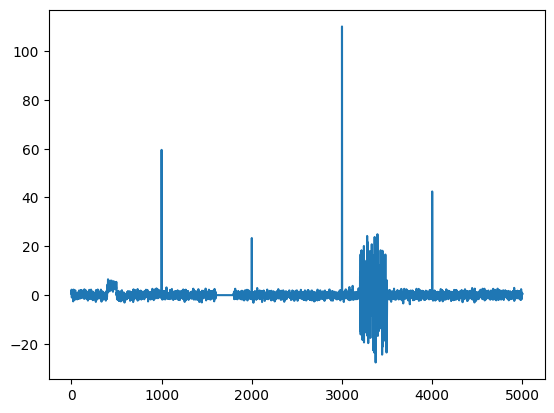

In [51]:
from statistics import median
from scipy.stats import median_abs_deviation
np.random.seed(0)
X = list(norm.rvs(size=5000,loc=0.0,scale=1.0))
X[400:500] = list(norm.rvs(size=100,loc=4.0,scale=1.0))
X[1600:1800] = list(norm.rvs(size=200,loc=0.0,scale=0.01))
X[3200:3500] = list(norm.rvs(size=300,loc=0.0,scale=10))
X[1000] = float(norm.rvs(size=1,loc=0.0,scale=100))
X[2000] = float(norm.rvs(size=1,loc=0.0,scale=100))
X[3000] = float(norm.rvs(size=1,loc=0.0,scale=100))
X[4000] = float(norm.rvs(size=1,loc=0.0,scale=100))

#mu = mean(X)
#mu =  median(X)
#sigma = sqrt(variance(Z)) # median_abs_deviation(Z)
#sigma = 1.4826*median_abs_deviation(X) # median_abs_deviation(Z)
#X = [(x-mu)/sigma for x in X] # normalise the data
plt.plot(X)
plt.show()

In [45]:
beta =  4*log(len(X))
beta_dash = 3*log(len(X))
res = capa_normal_mean(X,beta,beta_dash)
print("done")

done


In [46]:
for i in res.domain() :
    print(i,res(i))

0 (0, 0.0, 1)
1 (1, 5.551115123125783e-17, 1)
2 (1, 0.16737785702709174, 1)
3 (1, 1.7720334963333313, 1)
4 (1, 2.099686431209645, 1)
403 (401, 421.9524256151022, 1)
404 (401, 422.2731807215062, 1)
405 (401, 425.26368786013376, 1)
406 (400, 433.2959647530268, 1)
407 (400, 434.40860381926825, 1)
408 (400, 434.49205469223966, 1)
409 (400, 434.49264391948276, 1)
410 (400, 435.7164260519503, 1)
411 (400, 436.16568217482643, 1)
412 (400, 436.1735157891209, 1)
414 (400, 441.6857792925108, 1)
415 (400, 441.829678144284, 1)
416 (400, 442.4911505908787, 1)
417 (400, 442.84823503571187, 1)
418 (400, 443.4627629488584, 1)
419 (400, 443.5647757616214, 1)
420 (400, 447.32681892915457, 1)
421 (400, 448.3632526628765, 1)
422 (400, 451.9571053779172, 1)
424 (400, 456.917287728781, 1)
425 (400, 458.81951051060105, 1)
426 (400, 458.96343416259083, 1)
427 (400, 459.65264052134063, 1)
428 (400, 459.66374188788876, 1)
429 (400, 459.81112303446474, 1)
430 (400, 461.63153512391466, 1)
431 (400, 465.9717944403

In [ ]:
def glob(locs) :
    dom = locs.domain()
    ra,rb = min(dom),max(dom)
    r = rb
    while r != ra :
        index,cost,type = locs(r)
        if type == 2 :
            r = 

In [62]:
from itertools import accumulate
from math import inf

class smean :
    def __init__(self,minseglen=0) :
        self.SX = [0]
        self.SXX = [0]
        self.minseglen = minseglen
    def __call__(self,a,b) :
        if b - a + 1 < self.minseglen :
            return inf
        val = self.SX[b+1] - self.SX[a]
        val *= val
        val /= (b - a + 1)
        val = -val
        val += self.SXX[b+1] - self.SXX[a]
        return val
    def add(self,X) :
        for x in X :
            self.SX.append(self.SX[-1] + x)
            self.SXX.append(self.SXX[-1] + x*x)
        

In [58]:
scf = smean()

In [59]:
for x in X :
    scf.add(x)

In [61]:
from changed.cost.normal import mean as nm
from changed.core import point_function

         self.a = None
        self.fstar = point_function()
        self.f = lambda i,j : self.fstar(j)
        self.s = point_function()
        self.T = []
        self.cost = None


class scapa_normal_mean_state :
    def __init__(self) :
        self.g = smean()
        self.anoms = point_function()
        self.a = None
        self.fstar = point_function()
        self.f = lambda i,j : self.fstar(j)
        self.s = point_function()
        self.T = []
        self.cost = None

        
def scapa_normal_mean(S,x,beta,beta_dash,minsleglen = 0) :
    C1 = S.
    C2 = lambda i : C(i-1) + X[i]*X[i]
    C3 = lambda i : C(i-1) + beta_dash 
    for r in R :
        self.S = sop(self.S,g,[r],beta)
        cs = [C1(r),C2(r),C3(r)]
        c = min(cs)
        t = cs.index(c) + 1
        match t :
            case 1 :
                 anoms.union({(r,(S.s(r)[0],S.s(r)[1],1))})
            case 2 :
                S.s.union({(r,(S.s(r)[0],C2(r)))})
            case 3 :
                S.s.union({(r,(S.s(r)[0],C3(r)))})
                anoms.union({(r,(r,C3(r),3))})
    
        


def scapa_normal_mean(X,beta,beta_dash,minseglen=0) :
    S = sop_state()
    g = nm(X,minseglen)
    R = list(range(len(X)))
    C = lambda i : 0 if i < 0 else S.s(i)[1]
    C1 = lambda i : C(i)
    C2 = lambda i : C(i-1) + X[i]*X[i]
    C3 = lambda i : C(i-1) + beta_dash 
    anoms = point_function()
    for r in R :
        S = sop(S,g,[r],beta)
        cs = [C1(r),C2(r),C3(r)]
        c = min(cs)
        t = cs.index(c) + 1
        match t :
            case 1 :
                 anoms.union({(r,(S.s(r)[0],S.s(r)[1],1))})
            case 2 :
                S.s.union({(r,(S.s(r)[0],C2(r)))})
            case 3 :
                S.s.union({(r,(S.s(r)[0],C3(r)))})
                anoms.union({(r,(r,C3(r),3))}) 
    return anoms

In [77]:
from scipy import stats

class linear :
    def __init__(self,X,Y) :
        self.X = X
        self.Y = Y
        self.XY = np.array([X,Y])
    def __call__(self,i,j) :
        if j - i < 2 :
            return inf
        regression = stats.linregress(self.XY[:,i:(j+1)])
        a = regression.slope
        b = regression.intercept
        return sum([(y - a*x - b)*(y - a*x - b) for x,y in zip(self.X[i:(j+1)],self.Y[i:(j+1)])])/(j-i+1)

In [97]:
np.random.seed(0)
X1 = list(range(200))
E1 = norm.rvs(size=len(X1),scale=10)
a1 = 1.6
b1 = 2
Y1 = [a1*x + b1 + e for x,e in zip(X1,E1)]
X2 = [x + len(X1) for x in X1]
E2 = norm.rvs(size=len(X2),scale=10)
a2 = 1.2
b2 = (a1-a2)*X1[-1] + b1 
Y2 = [a2*x + b2 + e for x,e in zip(X2,E2)]
X = X1 + X2
Y = Y1 + Y2

In [98]:
res = stats.linregress(X, Y)
Y_hat = [res.slope*x + res.intercept for x in X]

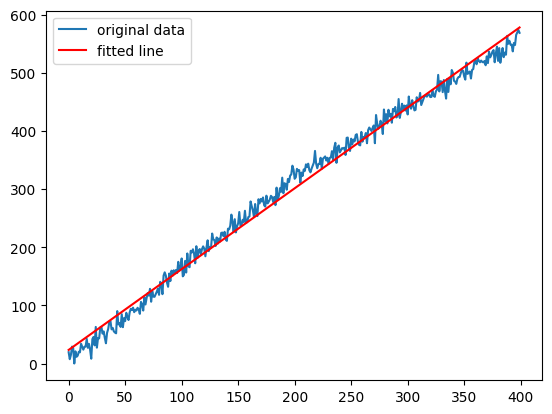

In [99]:
plt.plot(X, Y, label='original data')
plt.plot(X, Y_hat, 'r', label='fitted line')
plt.legend()
plt.show()

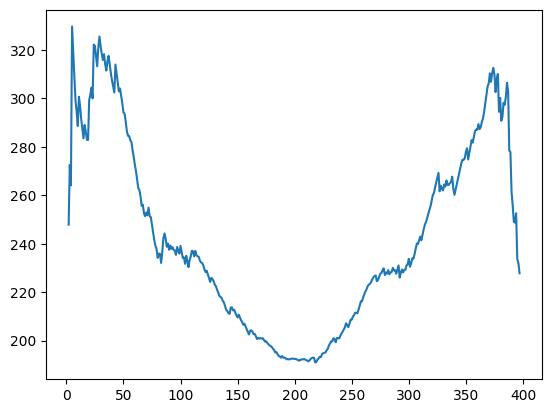

In [100]:
g = linear(X,Y)
plt.plot([g(0,i) + g(i+1,400) for i in range(len(X)-1) ])

In [90]:
amoc(g,list(range(len(X))),0)

(196, 191.67430746022433)

In [91]:
res = op(g,list(range(len(X))),30)

In [92]:
res(399)

(199, 220.28756821899896)